In [62]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

data = r'data/wilco_content_edgelist.csv'

In [63]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [64]:
df = pd.read_csv(data)
df.head()

,source,target
0,Jeff Tweedy,Wilco
1,Jeff Tweedy,Tweedy
2,Jeff Tweedy,Uncle Tupelo
3,Jeff Tweedy,Reprise Records
4,Jeff Tweedy,Warner Bros


In [65]:
G = nx.from_pandas_edgelist(df)

In [66]:
nx.info(G)

'Graph with 914 nodes and 1297 edges'

In [67]:
i = 0

components = {}

for component in nx.connected_components(G):
    
    components[i] = len(component)
    
    i += 1
    
component_df = pd.DataFrame(components, index=[0]).T
component_df.columns = ['node_count']

component_df.head()

,node_count
0,755
1,4
2,2
3,2
4,2


In [80]:
# the big ones

component_df[component_df['node_count']>10]

,node_count
0,755
14,14


<AxesSubplot:>

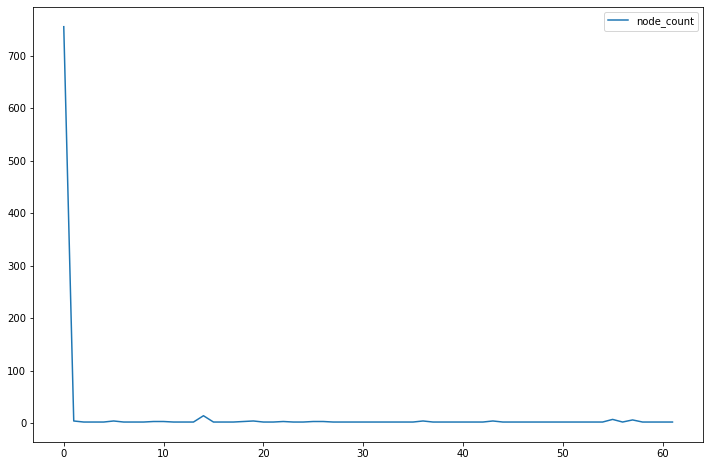

In [68]:
component_df.plot(figsize=(12,8))

In [69]:
degree_df = pd.DataFrame(G.degree)
degree_df.columns = ['node', 'degrees']
degree_df.head()

,node,degrees
0,Jeff Tweedy,40
1,Wilco,123
2,Tweedy,114
3,Uncle Tupelo,79
4,Reprise Records,11


<AxesSubplot:ylabel='Frequency'>

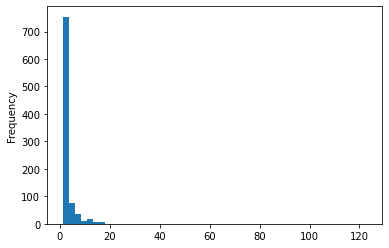

In [70]:
degree_df['degrees'].plot.hist(bins=50)

In [71]:
# Many components with few nodes, few components with many nodes
# Many nodes with few edges, few nodes with many edges

# The latter is understood in network science. I wonder if the former is, as well, because I see that, too.

In [72]:
# today, we will cut whole components and see if we can find a way to detect what has been removed

In [73]:
components = list(nx.connected_components(G))

components[1]

{'Cowboy Pictures',
 'Nielsen SoundScan',
 'the Los Angeles Film Festival',
 'the United States'}

In [74]:
components[2]

{'Gladys Nilsson –', 'Ken Waagner'}

In [76]:
# Exploring Components

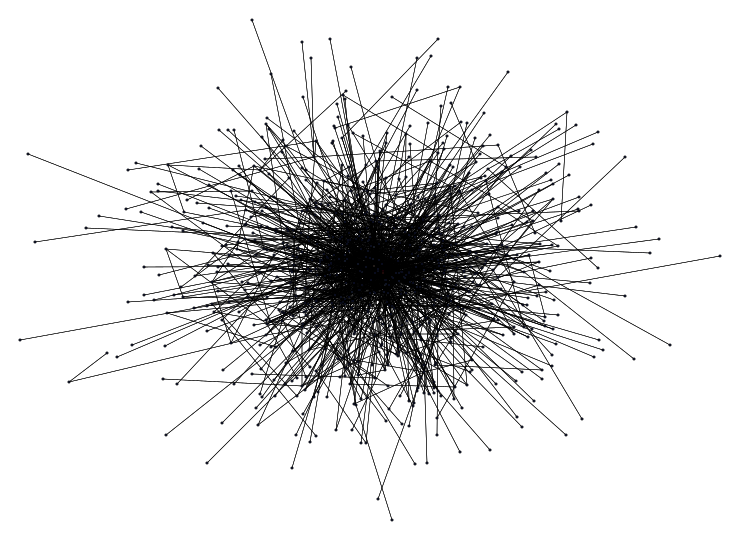

In [77]:
draw_graph(G.subgraph(components[0]))

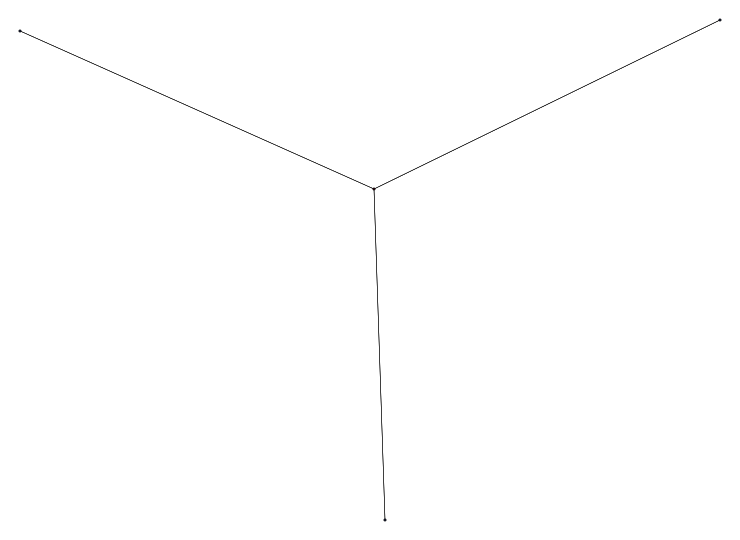

In [78]:
draw_graph(G.subgraph(components[1]))

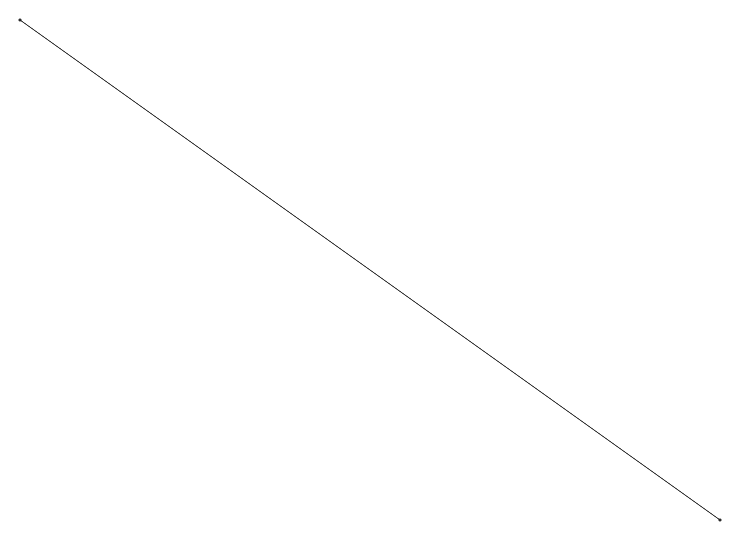

In [79]:
draw_graph(G.subgraph(components[2]))

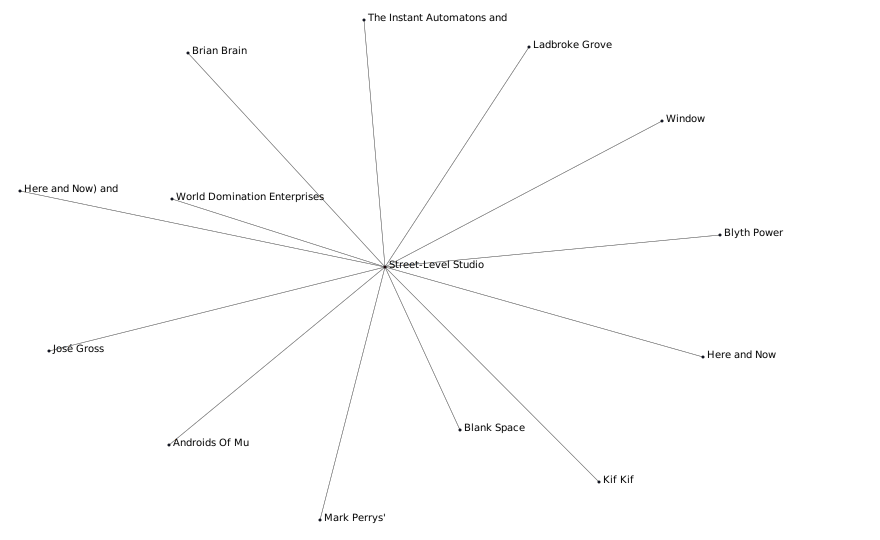

In [108]:
# turn this into a function; we can use this in the book as well
# will use this component to fall off the network, and try to detect it. goal will be to recapture the shape/relationships

relabel_map = {}

G_check = G.subgraph(components[14])

# identify problem nodes
fix_nodes = [n for n in G_check.nodes if '&' in n]

# map the fix
for node in fix_nodes:
    
    relabel_map[node] = node.replace('&', 'and')
    
# apply the fix
G_check = nx.relabel_nodes(G_check, relabel_map)

draw_graph(G_check, show_names=True)

Here & Now) &
Here & Now
The Instant Automatons &


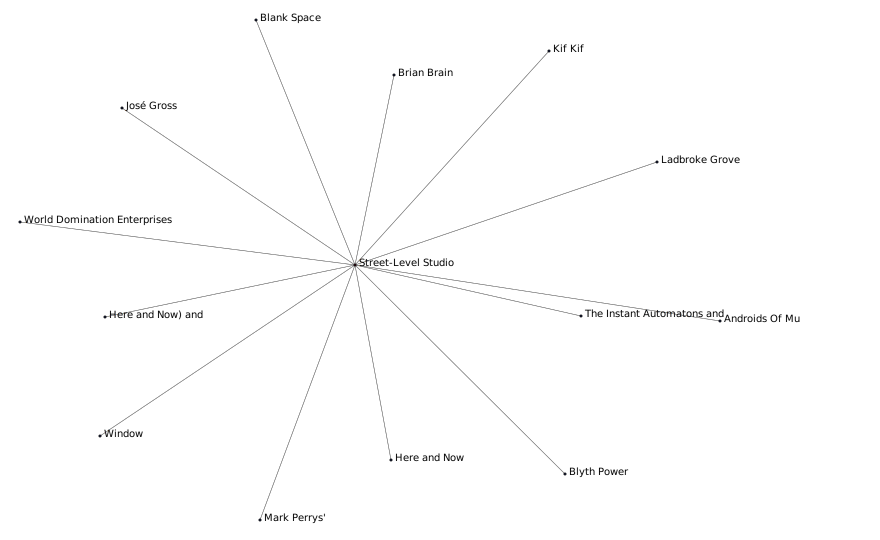

In [100]:
draw_graph(G_check, show_names=True)